# Learning about spatial data and maps for archaeology (and other things)

### Spatial Thinking and Skills Exercise 1 for Archaeology of Scotland

#### Made by Rachel Opitz, Archaeology, University of Glasgow



Archaeologists regularly work with maps and data about where sites, samples and objects are found. We ask lots of questions that have a spatial component. Which Bronze Age cairns are close to the coast in England? In this excavation, is bone found inside a building or outside in the yard? In archaeology space and place matter. It's important to learn to work with spatial data and maps in order to succeed in a variety of careers in archaeology and heritage management.

The aim of this exercise is for you to:
* learn to make very simple static maps
* learn to ask simple questions using spatial data. This is sometimes referred to as 'writing queries'.
* start thinking about the importance of spatial relationships and data in archaeology. 

To start working with spatial data and maps, you need to put together your toolkit. You're currently working inside something called a jupyter notebook, which will be a key part of your spatial analysis toolkit. It's a place to keep notes, pictures, code and maps together. You can add tools and data into your jupyter notebook and then use them to ask spatial questions and make maps and visualisations that help answer those questions. 

Work your way down the page, reading the notes and comments at each step and then running it's code to see the results. Anything written with a # symbol in front of it is a comment. Be sure to read these!

![The map that came to life](https://c1.staticflickr.com/4/3017/2863068137_055aef279a_b.jpg)

### We'll start by adding some of the tools we will need.

In [1]:
# Start loading your tools by telling the notebook to 'import' them (from the internet).

%matplotlib inline
import pandas as pd
import requests
import fiona
import geopandas as gpd
import ipywidgets as widgets
import bokeh

# These are what we call prerequisites. They are basic toosl you need to get started.
# Pandas manipulate data. Geo-pandas manipulate geographic data. They're also black and white and like to eat bamboo... 
# You need these to manipulate your data!
# Fiona helps with geographic data.
# Requests are for asking for things. It's good to be able to ask for things.
# ipywidgets supports interactivity. 
# Matplotlib is your tool for drawing graphs and basic maps. You need this!

### Now that we have the basic tools loaded up we need some data. This data is from the Linlithgow Carmetlite Monastery Cemetery excavations, and can be downloaded from the Archaeological Data Service (ADS).

The [ADS](http://archaeologydataservice.ac.uk/) is an archaeological archive that provides data on an open access basis. You can learn more about the Linlithgow excavations dataset, which is part of the 'Medieval Monastic Cemeteries of Britain (1050-1600)' Project [here](http://archaeologydataservice.ac.uk/archives/view/cemeteries_ahrb_2005/index.cfm). 

In [ ]:
url = 'https://raw.githubusercontent.com/ropitz/spatialarchaeology/master/data/linlithgow_burials_Features.json'
# This is where I put the data. It's in a format called geojson, used to represent geometry (shapes) and attributes (text).
# Geojson is a common format for spatial data, especially if it is being shared online.

request = requests.get(url)
# Please get me the data at that web address (url)

b = bytes(request.content)
# I will use the letter 'b' to refer to the data, like a nickname. 
# In this step, I am reading the stuff on the page the url (web address ) points to

with fiona.BytesCollection(b) as f:
    crs = f.crs
    linlithgow_burials = gpd.GeoDataFrame.from_features(f, crs=crs)
    print(linlithgow_burials.head())
# In this step I will use the fiona tool to wrap up all the data from 'b' into a tidy package. 
# Then I check the coordinate system (crs) listed in the file
# and print out the first few lines of the file so I can check everything looks ok. 
# Don't worry if you don't understand all the details of this part!



In [3]:
linlithgow_burials = gpd.read_file('../data/linlithgow_burials_Features.json')
linlithgow_burials

,FID,CONTEXT,E_DATE,L_DATE,AG,AT,SX,AP,BASE_LIN,geometry
0,0,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.28859 14.64156, 4.28859 14.75411..."
1,1,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.62227 14.60404, 4.62052 14.62415..."
2,2,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.62669 14.60404, 5.73112 14.66407)"
3,3,155,155,1250,1325,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,"LINESTRING (5.8978 13.9964, 5.92324 14.1065, 5..."
4,4,155,155,1250,1325,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,"LINESTRING (6.15776 13.91171, 6.156 13.93182, ..."
...,...,...,...,...,...,...,...,...,...,...
414,414,96,96,1400,1560,GENERAL IMMATURE,SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (29.10995 14.95953, 29.1051 14.8965..."
415,415,132,132,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (30.31491 14.87776, 30.324 14.94135..."
416,416,154,154,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (5.22682 13.32041, 5.23365 13.26604..."
417,417,169,169,1250,1325,ADULT (26-45),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (7.62631 14.40859, 7.64994 14.29056..."


### Does that look right? 

You should have a bunch of information that describes the shapes of lines. These are the outlines of the shape of each burial and a 'stick figure' type skeleton for some of them of the contexts from Linlithgow. You should also have a bunch of descriptions and information about the burials archaeology. Importatly you should be able to spot the column names: Descriptio, objectid, shape_area, shape_leng, SU, definition, finds_note, formation, geometry, interpret. Each column contains a different type of information. Note that SU (stratigraphic unit) = context. 

Spatial data by itself isn't that useful. If we just had a bunch of lines and no descriptions of them we couldn't say much about the archaeological features at Linlithgow's cemetery. It's the combination of spatial and descriptive data that is interesting. 

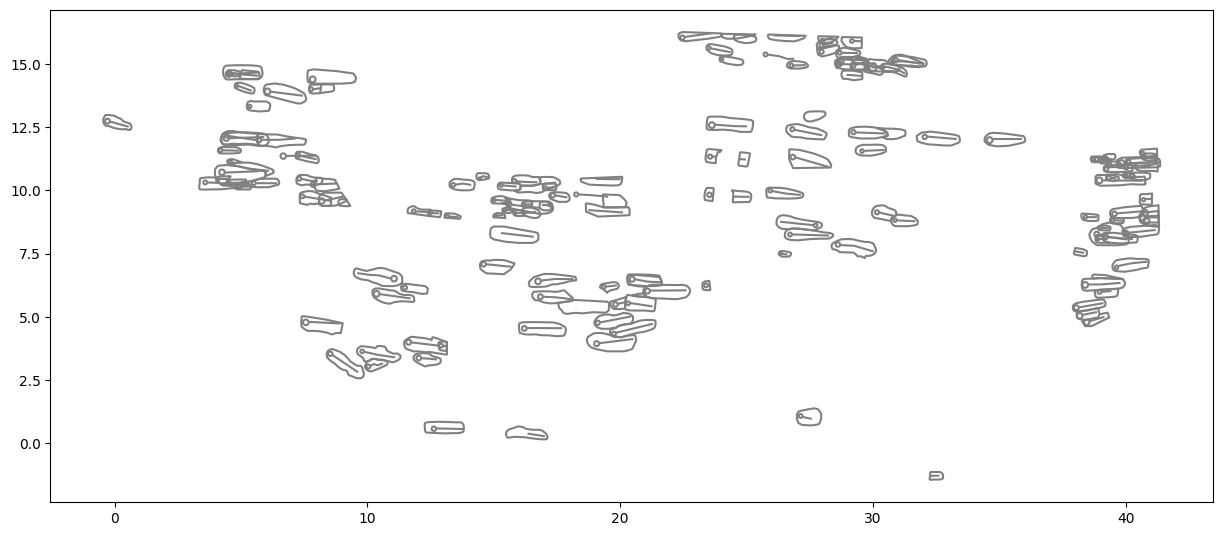

In [4]:
# Right now you have your spatial and descritive data as a table. 
# It's hard to read spatial data as just a list of numbers and understand the shapes that are being described.
# Let's visualise the data as a map to better understand the spatial information. 

linlithgow_map1 = linlithgow_burials.plot(column='AT', cmap='Accent', edgecolor='grey', figsize=(15, 15));

# Let's break down that command.
# 'plot' means draw me a map showing the geometry of each feature in my data. 
# We want to control things like the color of different types of burials on our map. 
# I used the pastel colorscale command (cmap stands for 'colour map') 
# and asked it to draw the polygons differently based on the type of burial. 
# The 'AT' column, you can see in the table, lists the different types of burials.
# I also told it to make my figure 15x15 in size (figsize).


### Well done! You just made your first archaeological map. It shows all the  burials excavated at Carmelite Linlithgow. 

This is good, but what if you only want to look at one kind of burial? We can select specific types of burials from within our dataset by searching (aka querying) for them. 

How do we know what kind of burials we have? Looking at what's inside the data describing all those shapes on the map should help. 

Start by printing out our data in a tidy way. Just type its name...

In [5]:
linlithgow_burials
# Typing the name of any dataset will print it out

,FID,CONTEXT,E_DATE,L_DATE,AG,AT,SX,AP,BASE_LIN,geometry
0,0,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.28859 14.64156, 4.28859 14.75411..."
1,1,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.62227 14.60404, 4.62052 14.62415..."
2,2,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.62669 14.60404, 5.73112 14.66407)"
3,3,155,155,1250,1325,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,"LINESTRING (5.8978 13.9964, 5.92324 14.1065, 5..."
4,4,155,155,1250,1325,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,"LINESTRING (6.15776 13.91171, 6.156 13.93182, ..."
...,...,...,...,...,...,...,...,...,...,...
414,414,96,96,1400,1560,GENERAL IMMATURE,SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (29.10995 14.95953, 29.1051 14.8965..."
415,415,132,132,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (30.31491 14.87776, 30.324 14.94135..."
416,416,154,154,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (5.22682 13.32041, 5.23365 13.26604..."
417,417,169,169,1250,1325,ADULT (26-45),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (7.62631 14.40859, 7.64994 14.29056..."


In archaeology we often talk about the dates at which different things happened, and when activities started and ended. Sometimes we are not sure when something happened, so we give a range of dates with an early guess and a late guess. Look at the 'e_date' (earliest date) and 'l_date' (latest date) columns in the table, and you'll see the date ranges guessed for each burial.

In [6]:
# Say you only want to look at the burials from before 1400, the first ones. Pandas use square brackets [] to make selections. 
# Here we select all the rows (.loc) where the column 'L_DATE' has a value less than 1400. < means 'less than' in code

linlithgow_burials.loc[linlithgow_burials['L_DATE']<1400]

,FID,CONTEXT,E_DATE,L_DATE,AG,AT,SX,AP,BASE_LIN,geometry
0,0,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.28859 14.64156, 4.28859 14.75411..."
1,1,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.62227 14.60404, 4.62052 14.62415..."
2,2,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.62669 14.60404, 5.73112 14.66407)"
3,3,155,155,1250,1325,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,"LINESTRING (5.8978 13.9964, 5.92324 14.1065, 5..."
4,4,155,155,1250,1325,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,"LINESTRING (6.15776 13.91171, 6.156 13.93182, ..."
...,...,...,...,...,...,...,...,...,...,...
381,381,123,123,1325,1375,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (38.46956 8.94634, 38.46856 8.95776..."
395,395,31,31,1250,1560,NO AGE,,UNK,NOT DEFINITIVE,"LINESTRING (40.15154 10.59501, 40.17651 10.661..."
416,416,154,154,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (5.22682 13.32041, 5.23365 13.26604..."
417,417,169,169,1250,1325,ADULT (26-45),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (7.62631 14.40859, 7.64994 14.29056..."


<Axes: >

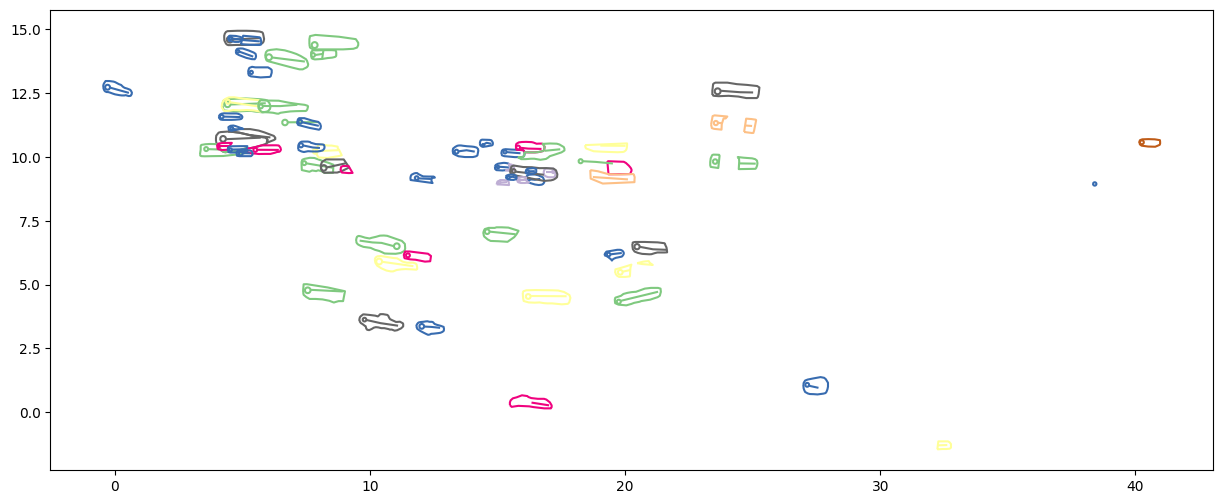

In [7]:
# You should have a table view of the data and if you look at the 'L_Date' column, you should only see dates earlier than 1400.
# If we want to see this result as a map, we just add the .plot command to the end.

linlithgow_burials.loc[linlithgow_burials['L_DATE'] <1400].plot(column='AT', cmap='Accent', figsize=(15, 15))

# Note that I've used many of the same commands that I used before to control the color of the features and the map size.

In [8]:
# Try and do the same thing for burials that are earlier than 1500
linlithgow_burials.loc[(linlithgow_burials['L_DATE']<=1500) & (linlithgow_burials['L_DATE'] >= 1400)]

,FID,CONTEXT,E_DATE,L_DATE,AG,AT,SX,AP,BASE_LIN,geometry
49,49,201,201,1450,1500,IMMATURE (11-15),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (8.42709 3.64021, 8.38939 3.54608, ..."
50,50,201,201,1450,1500,IMMATURE (11-15),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (8.6156 3.53458, 8.61428 3.54962, 8..."
51,51,201,201,1450,1500,IMMATURE (11-15),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (8.61473 3.48565, 9.63141 2.80058)"
52,52,190,190,1450,1500,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (9.90656 2.97096, 9.96542 2.91218, ..."
53,53,190,190,1450,1500,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (10.11257 3.02974, 10.11138 3.04337..."
...,...,...,...,...,...,...,...,...,...,...
411,411,114,114,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (27.7902 15.50735, 27.83781 15.3646..."
412,412,95,95,1400,1560,JUVENILE (6-10),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (29.82274 14.83515, 29.82181 14.845..."
413,413,95,95,1400,1560,JUVENILE (6-10),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (29.66358 14.87412, 29.66358 14.757..."
414,414,96,96,1400,1560,GENERAL IMMATURE,SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (29.10995 14.95953, 29.1051 14.8965..."


<Axes: >

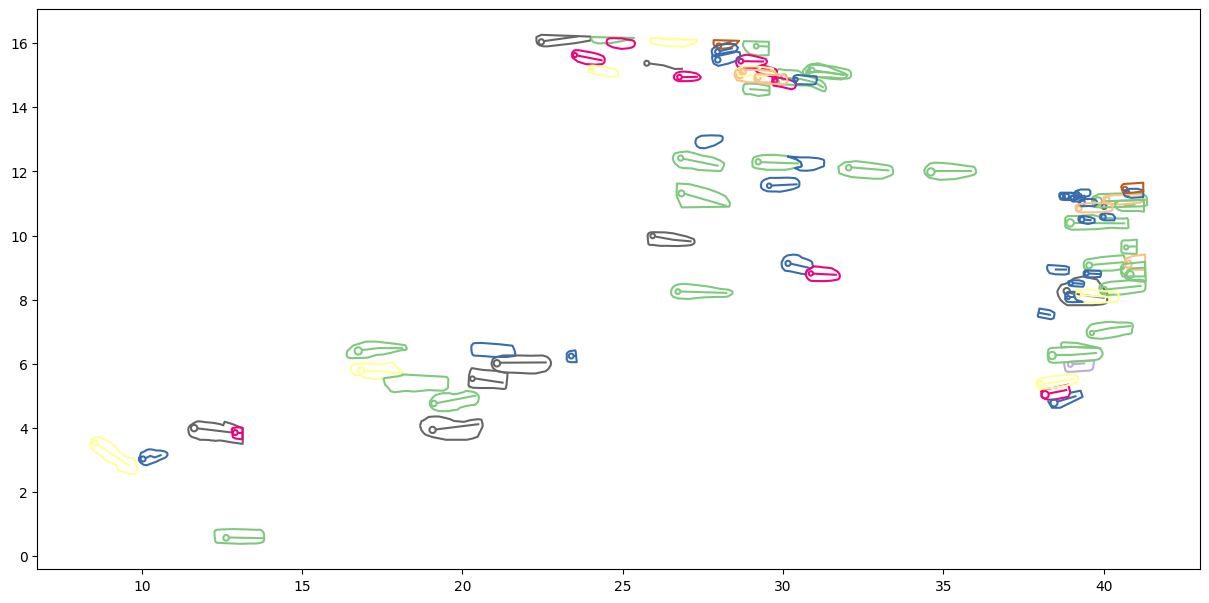

In [9]:
# Remember to draw it as a map!
linlithgow_burials.loc[(linlithgow_burials['L_DATE']<=1500) & (linlithgow_burials['L_DATE'] >= 1400)].plot(column='AT', cmap='Accent', figsize=(15, 15))

In [10]:
# Let's save these selections of 'pre1400' and 'pre1500' so we can use them again.
# I've given them names here. These are now 'named variables'
pre1400 = linlithgow_burials.loc[linlithgow_burials['L_DATE'] <1400]
pre1500 = linlithgow_burials.loc[(linlithgow_burials['L_DATE']<=1500) & (linlithgow_burials['L_DATE'] >= 1400)]

In [11]:
#Test your named variable by printing it out again, calling it by its name.
pre1400

,FID,CONTEXT,E_DATE,L_DATE,AG,AT,SX,AP,BASE_LIN,geometry
0,0,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.28859 14.64156, 4.28859 14.75411..."
1,1,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.62227 14.60404, 4.62052 14.62415..."
2,2,146,146,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,"LINESTRING (4.62669 14.60404, 5.73112 14.66407)"
3,3,155,155,1250,1325,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,"LINESTRING (5.8978 13.9964, 5.92324 14.1065, 5..."
4,4,155,155,1250,1325,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,"LINESTRING (6.15776 13.91171, 6.156 13.93182, ..."
...,...,...,...,...,...,...,...,...,...,...
381,381,123,123,1325,1375,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (38.46956 8.94634, 38.46856 8.95776..."
395,395,31,31,1250,1560,NO AGE,,UNK,NOT DEFINITIVE,"LINESTRING (40.15154 10.59501, 40.17651 10.661..."
416,416,154,154,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (5.22682 13.32041, 5.23365 13.26604..."
417,417,169,169,1250,1325,ADULT (26-45),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (7.62631 14.40859, 7.64994 14.29056..."


So far these searches have been about the attributes of our data, or the way each context has been described. You could try selecting on different attributes to ask your own questions, following the pattern of commands we used above. For example, you could search for a specific type of burial, or for burials later than a certain date. 

We can also ask questions about spatial relationships between contexts or about the real-world location of our contexts. For example, we could try and find out the location of our whole data. To describe the location of the whole dataset, we might draw a box around all the features. This is called a 'bounding box'. Let's find the bounding box, or real world location and extent of our data. We use the command 'total_bounds' to ask this question. Things 'in bounds' are inside the box.

In [12]:
pre1400.total_bounds

array([-0.44993622, -1.45503866, 40.96710772, 14.94919826])

You should see a set of coordinates that represent the location of your data in the real world. They are in a coordinate system called OSBG. OSBG is one of the most common coordinate systems in the UK. You can learn more about coordinate systems [here](https://www.e-education.psu.edu/natureofgeoinfo/c2_p10.html) and [here](https://www.e-education.psu.edu/natureofgeoinfo/c2_p11.html).

Why does this matter? Well, if you wanted to get out a map and find the location of this cemetery so you could go visit the place, you would need the coordinates. If you wanted to tell someone else where they were, or tell a planner the area where they should not build a road, you would need the coordiantes to do so.

In [13]:
# Now do the same thing for the pre-1500 burials. The results should be similar, but not identical.
# Take a minute and think about why this would be the case.
pre1500.total_bounds

array([ 8.38939474,  0.38325071, 41.35853322, 16.26253414])

<Axes: >

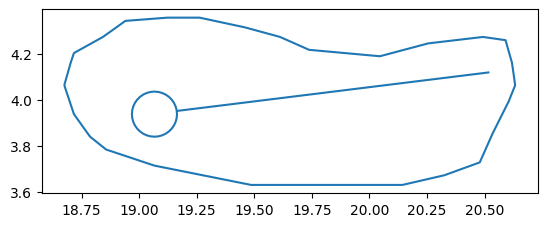

In [14]:
# So far we have been asking questions about groups of features of different types. 
# We can also ask spatial questions about single contexts or burials.
# Now we will select a single burial by the context number assigned to it.
pre1500_182 = pre1500.loc[pre1500['CONTEXT'] == 182]
pre1500_182
pre1500_182.plot()

<Axes: >

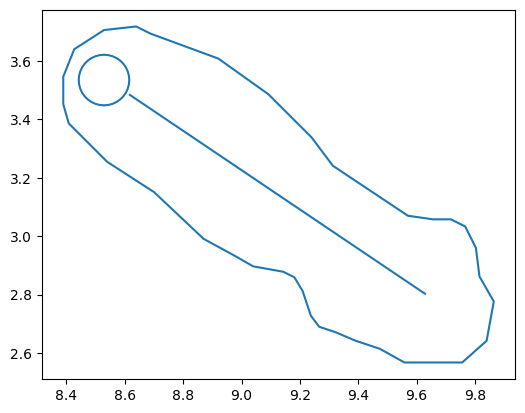

In [15]:
#Now we will select another specific burial.
pre1500_201 = pre1500.loc[pre1500['CONTEXT'] == 201]
pre1500_201
pre1500_201.plot()

### One of these burials is immature (a young person) while one is identified as an older person.
 
What kinds of spatial questions can we ask by comparing individual burials? We might ask if they are they different shapes or sizes, or facing different directions. Look at the maps and try and spot any differences. Orientation is easy enough, but it's hard to compare size when the burials are on different maps. Putting the individual burials we want to compare on the same map will make it easier.

<Axes: >

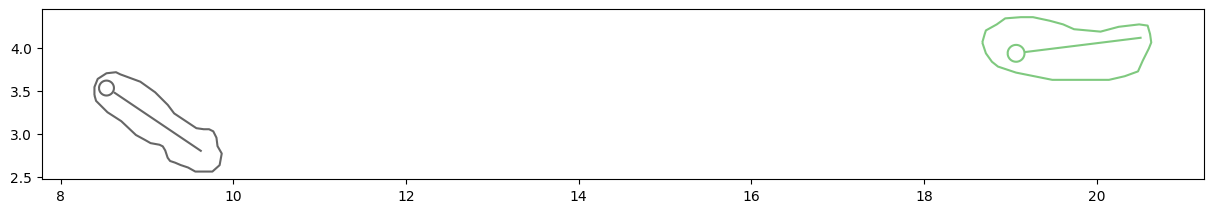

In [16]:
# To do this we have to provide a list of the values we are interested in seeing on the map, in square brackets []
pre1500_both= pre1500.loc[pre1500['CONTEXT'].isin([201,182])]
pre1500_both
pre1500_both.plot(column='CONTEXT', cmap='Accent', figsize=(15, 15))

What does this map suggest? Are there any size, shape or orientation differences in these burials? What might similarities or differences mean?

### Now try another question. What if we wanted to find all the contexts defined as infant burials? 

Look in the 'AT' column. Infants are defined as 'INFANT (0-5)'. In many archaeological situations infants are buried differently. Perhaps they are in a separate area, or always close to an adult. These are interesting questions to investigate spatially.

In [17]:
linlithgow_infants = linlithgow_burials[linlithgow_burials['AT'].str.contains('INFANT')]
linlithgow_infants
# The command .str.contains means that we want all the contexts where the word 'infant' appears anywhere in the AT column.
# It doesn't have to be an exact match, which is useful as archaeological data is often a little inconsistent or untidy.

,FID,CONTEXT,E_DATE,L_DATE,AG,AT,SX,AP,BASE_LIN,geometry
10,10,154,154,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (5.41127 13.31728, 5.41032 13.32817..."
12,12,205,205,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (-0.44994 12.81349, -0.42775 12.879..."
13,13,205,205,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (-0.18834 12.73607, -0.18979 12.752..."
14,14,205,205,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (-0.18726 12.72118, 0.55276 12.51493)"
52,52,190,190,1450,1500,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,"LINESTRING (9.90656 2.97096, 9.96542 2.91218, ..."
...,...,...,...,...,...,...,...,...,...,...
405,405,51,51,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (40.61136 11.37242, 40.63299 11.286..."
410,410,90,90,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (27.77357 15.79877, 27.89714 15.904..."
411,411,114,114,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (27.7902 15.50735, 27.83781 15.3646..."
415,415,132,132,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,"LINESTRING (30.31491 14.87776, 30.324 14.94135..."


<Axes: >

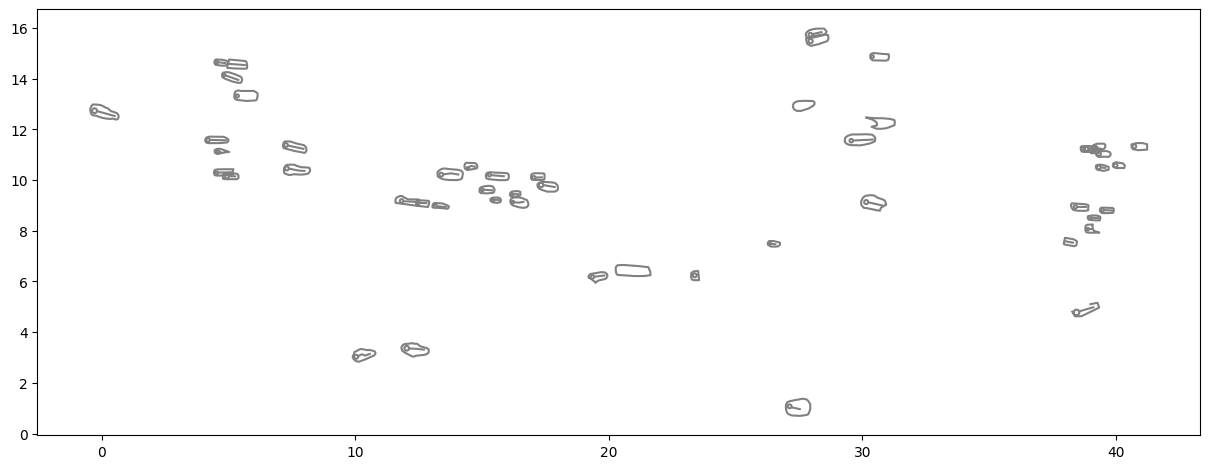

In [18]:
# Now create a map of all the burials of infants.
linlithgow_infants.plot(column='CONTEXT', cmap='Accent', edgecolor='grey', figsize=(15, 15))

### What if we wanted to know about burials that were near infant burials? Let's construct a new query.
How close is close? Let's say 0.5meters. This will be a two step process...


<Axes: >

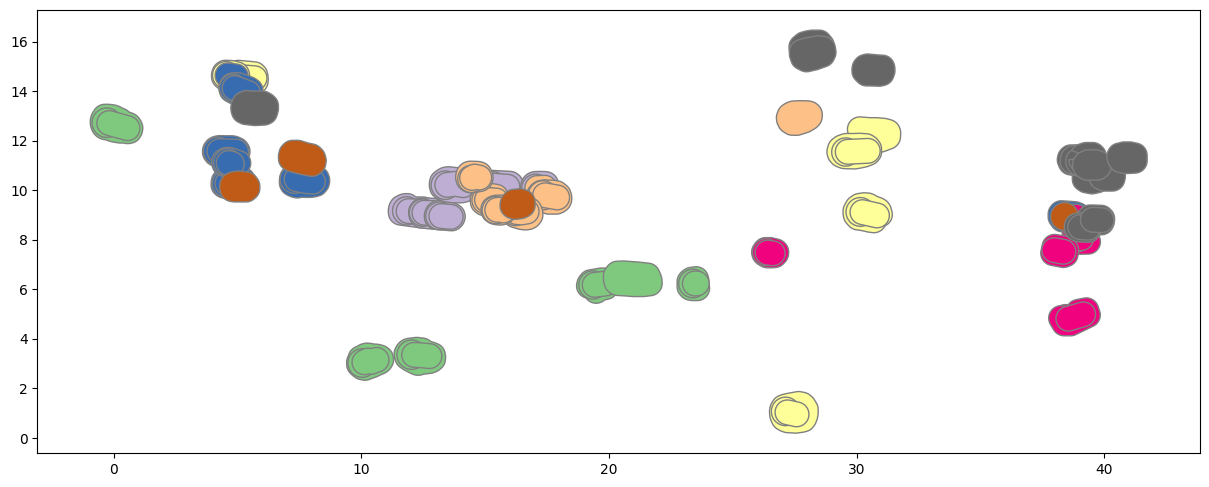

In [19]:
# First we use the 'buffer' command to expand the size of each line and make it 0.5m thick
# Doing this defines the area within 0.5 of each infant burial.
linlithgow_infants_close = linlithgow_infants.buffer(0.5)
linlithgow_infants_close.plot(cmap='Accent', edgecolor='grey', figsize=(15, 15))

<Axes: >

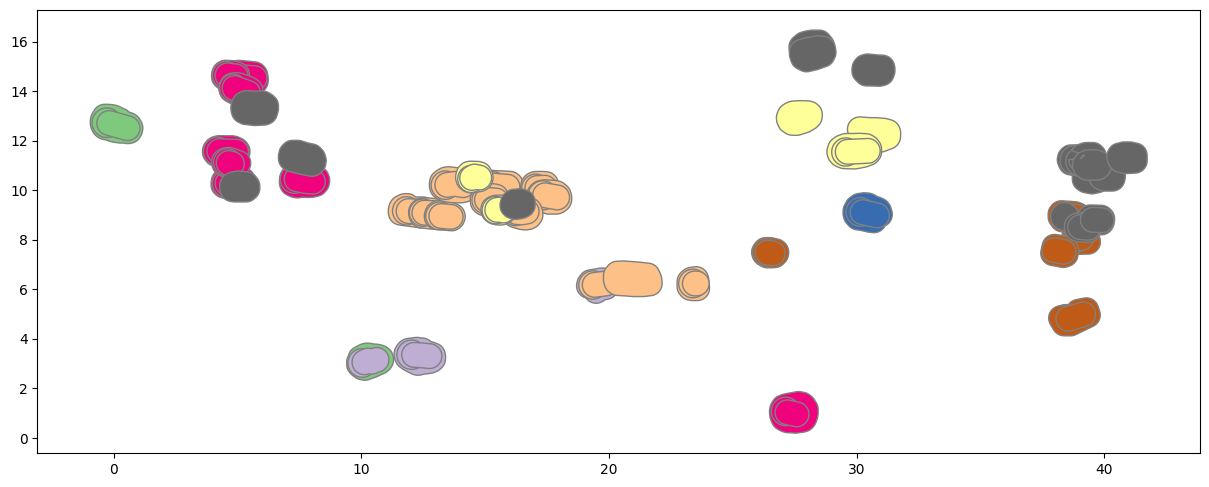

In [20]:
# Now we plot the intersection between the buffered infant burials shapes and all the other burials shapes.
# This result should return all the burials that physically overlap the area within 0.5 of infant burials.
linlithgow_burials.union(linlithgow_infants_close, align=True).plot(cmap='Accent', edgecolor='grey', figsize=(15, 15))

### What do we conclude? Are infants buried close to other burials? To adults?

### This ends the tutorial. You can practice writing queries (asking questions of your data) by playing around in this notebook. Try changing values or searching for different types of burials or their dates. You'll be doing this in class during your next practical!

Hopefully you learned to:
* make very simple static maps
* ask simple questions using spatial data. This is sometimes referred to as 'writing queries'.
* start thinking about the importance of spatial relationships and data in archaeology. 
